In [1]:
import pandas as pd
import numpy as np
from scipy.io import loadmat as loadmat
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False

# Suppress warnings`
warnings.filterwarnings("ignore")

In [2]:
import xy

# $因子描述：N日量变动速率指标$

***成交量减N日前的成交量，再除以N日前的成交量***  

## 计算

In [3]:
weights50_1 = xy.weights50/xy.weights50 
weights300_1 = xy.weights300/xy.weights300 
weights500_1 = xy.weights500/xy.weights500 
weights1000_1 = xy.weights1000/xy.weights1000 

index_volumes = pd.concat([
        (weights50_1 * xy.volumes ).sum().rename('50'),
        (weights300_1 * xy.volumes ).sum().rename('300'),
        (weights500_1 * xy.volumes ).sum().rename('500'),
        (weights1000_1 * xy.volumes ).sum().rename('1000')
    ],axis=1).T.loc[:,xy.trd_dates].shift(1,axis=1)

_index_VROC12 = ((index_volumes - index_volumes.shift(12,axis=1)) / index_volumes.shift(12,axis=1)).dropna(axis=1,how='all')

In [4]:
st_VROC5 = (xy.volumes.mask(xy.volumes==0,np.nan) - xy.volumes.mask(xy.volumes==0,np.nan).shift(5,axis=1)) / xy.volumes.mask(xy.volumes==0,np.nan).shift(5,axis=1)
st_VROC10 = (xy.volumes.mask(xy.volumes==0,np.nan) - xy.volumes.mask(xy.volumes==0,np.nan).shift(10,axis=1)) / xy.volumes.mask(xy.volumes==0,np.nan).shift(10,axis=1)
st_VROC12 = (xy.volumes.mask(xy.volumes==0,np.nan) - xy.volumes.mask(xy.volumes==0,np.nan).shift(12,axis=1)) / xy.volumes.mask(xy.volumes==0,np.nan).shift(12,axis=1)
st_VROC15 = (xy.volumes.mask(xy.volumes==0,np.nan) - xy.volumes.mask(xy.volumes==0,np.nan).shift(15,axis=1)) / xy.volumes.mask(xy.volumes==0,np.nan).shift(15,axis=1)

st_VROC_mean = st_VROC5 + st_VROC10 + st_VROC12 + st_VROC15

st_index_VROC_mean = xy.read_Factor(xy.trd_dates,'st_index_VROC_mean',df=st_VROC_mean)

## 评估

### cl-cl

-0.014094329481079667
1 1.0
2 1.0
3 1.0
4 1.0


<Axes: >

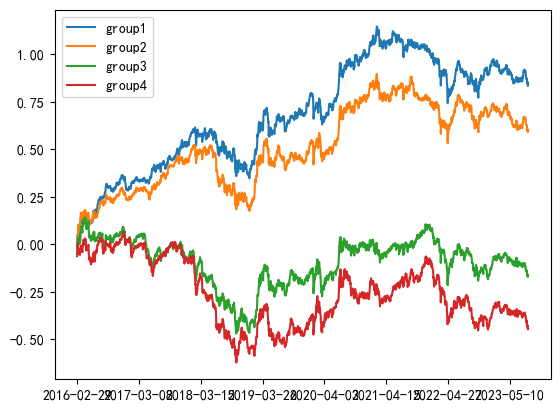

In [5]:
# 分组收益率
gr_st_index_VROC_mean = xy.cal_rate_group(
    st_index_VROC_mean.loc[['50', '300', '500', '1000'],'2016-02-28':],
    xy.Index_rets.loc[['50', '300', '500', '1000'],'2016-02-28':],
    group_num=4,
    masks=1
)
gr_st_index_VROC_mean.cumsum().plot()

-0.01697591605738928
1 1.0
2 1.0
3 1.0
4 1.0


<Axes: >

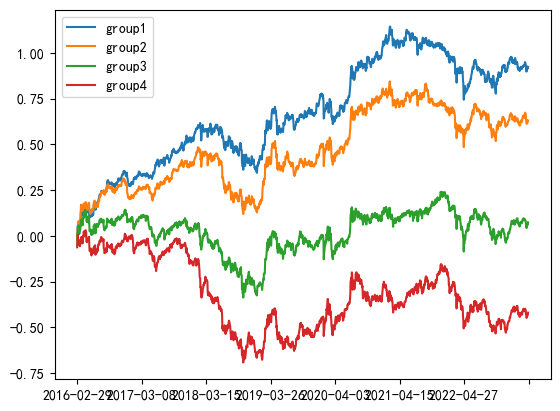

In [7]:
# 分组收益率
gr_st_index_VROC_mean = xy.cal_rate_group(
    st_index_VROC_mean.loc[['50', '300', '500', '1000'],'2016-02-28':],
    xy.Index_rets.loc[['50', '300', '500', '1000'],'2016-02-28':],
    group_num=4,
    masks=1
)
gr_st_index_VROC_mean.cumsum().plot()

2736.0
yoy: 0.17835908723943952 
 mdd: -0.2919378851782428 
 sharpe: 1.0465003258615624 
 rankIC: -0.013143483023001098 
 rankIR: -0.01697277901098026 
 win%: 0.5153340635268346 
 gain_loss%: -1.124847220504651


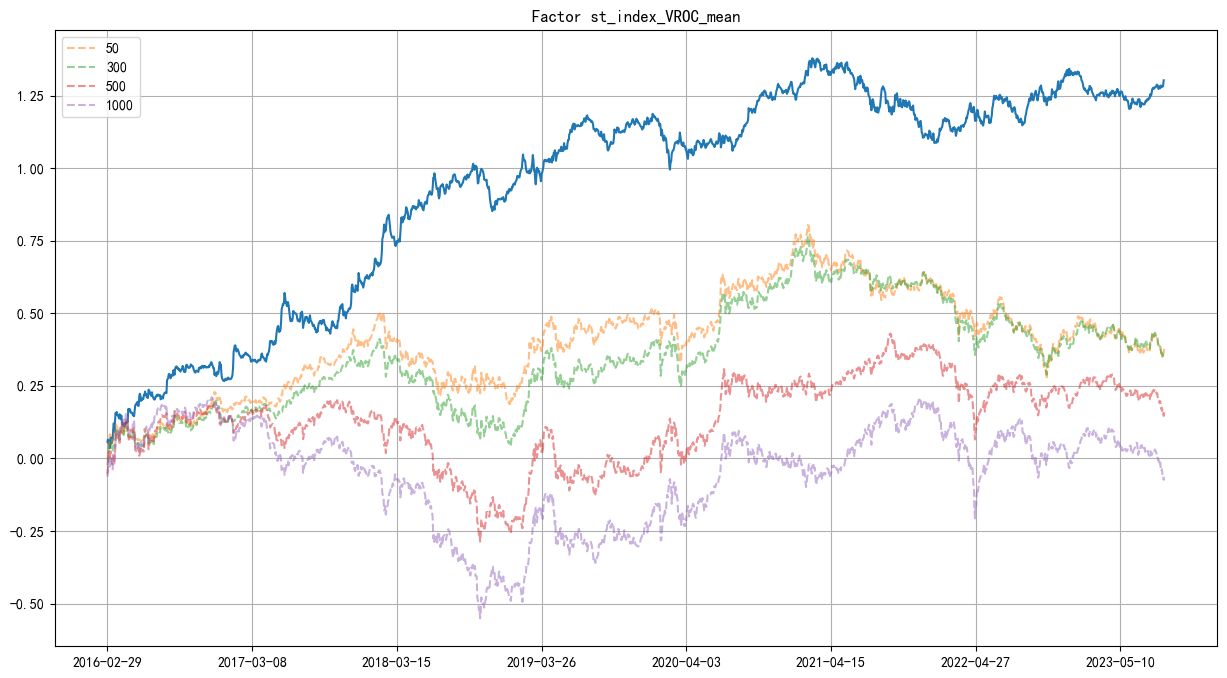

In [6]:
# 单因子强弱
st_index_VROC_mean_select, st_index_VROC_mean_rets = xy.single_Factor_backtest(
    st_index_VROC_mean.T.rolling(1).mean().T.loc[['50', '300', '500', '1000'],'2016-02-28':],
    xy.Index_rets.loc[['50', '300', '500', '1000'],'2016-02-28':],
    _side=-1,
    fee=0.000,
    name='st_index_VROC_mean'
)

-0.016571428571428574

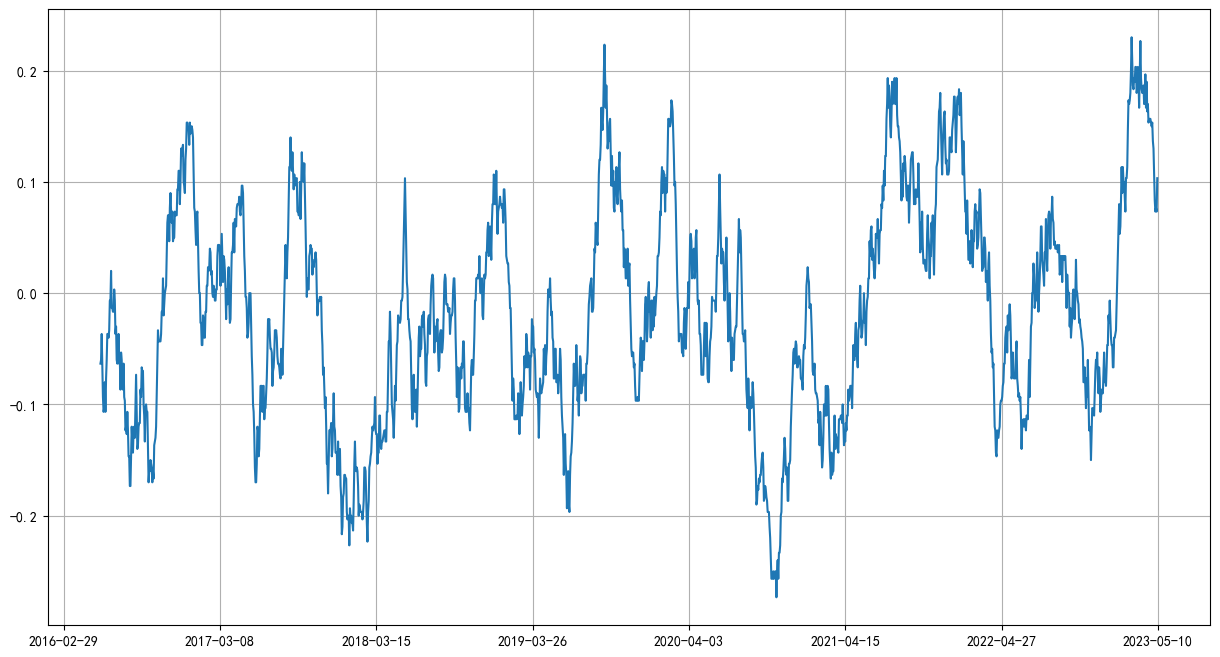

In [10]:
# 因子截面IC趋势
rankIC = xy.Index_rets.loc[['50', '300', '500', '1000'],'2016-02-28':].rank(ascending=False).corrwith(st_index_VROC_mean.loc[['50', '300', '500', '1000'],'2016-02-28':].rank(ascending=False))
rankIC.rolling(60).mean().plot(figsize=(15,8),grid=1)
rankIC.mean()

### cl_op

-0.18370694005453875
1 1.0
2 1.0
3 1.0
4 1.0


<Axes: >

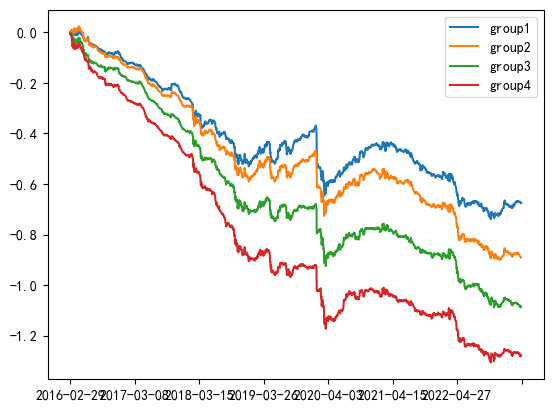

In [11]:
# 分组收益率
grst_index_VROC_mean = xy.cal_rate_group(
    st_index_VROC_mean.T.rolling(1).mean().T.loc[['50', '300', '500', '1000'],'2016-02-28':],
    xy.bonus_open_cl_rets.loc[['50', '300', '500', '1000'],'2016-02-28':],
    group_num=4,
    masks=1
)
grst_index_VROC_mean.cumsum().plot()

2628.0
yoy: 0.08564998252703367 
 mdd: -0.08442534554027104 
 sharpe: 1.811529870809842 
 rankIC: -0.12125714285714286 
 rankIR: -0.16788510225058867 
 win%: 0.5805714285714285 
 gain_loss%: -1.0298669648316936


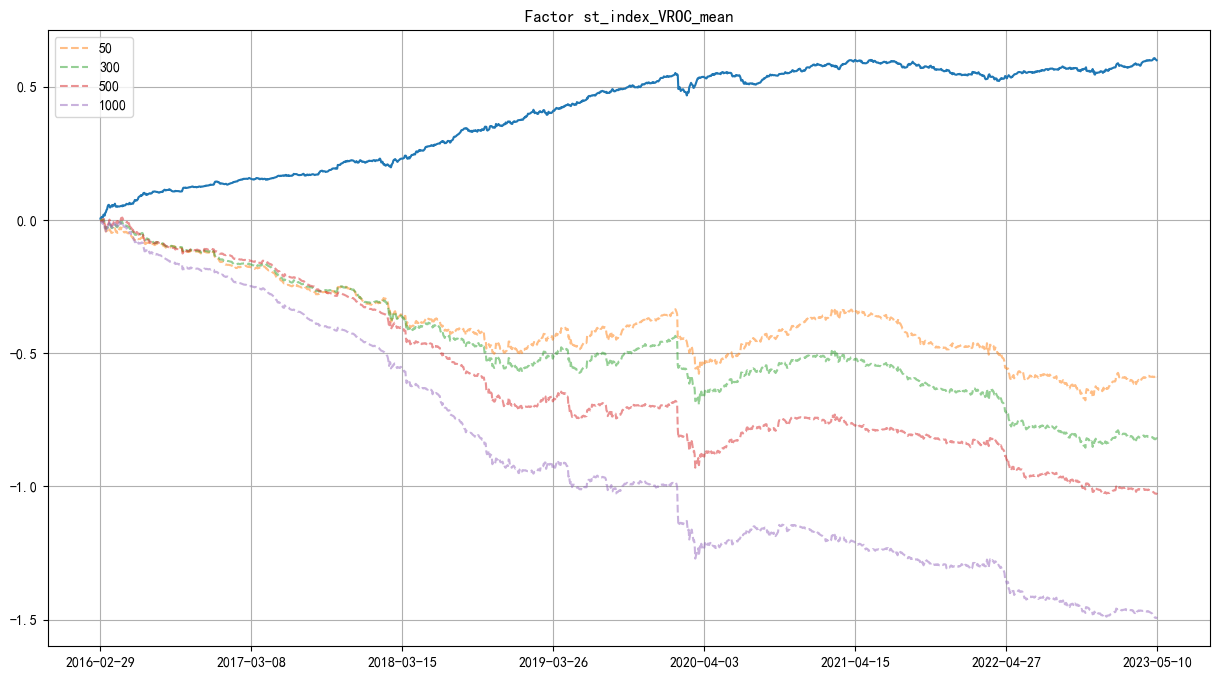

In [13]:
# 单因子强弱
st_index_VROC_mean_select, st_index_VROC_mean_rets = xy.single_Factor_backtest(
    st_index_VROC_mean.T.rolling(1).mean().T.loc[['50', '300', '500', '1000'],'2016-02-28':],
    xy.bonus_open_cl_rets.loc[['50', '300', '500', '1000'],'2016-02-28':],
    _side=-1,
    fee=0.000,
    name='st_index_VROC_mean'
)

-0.12125714285714286

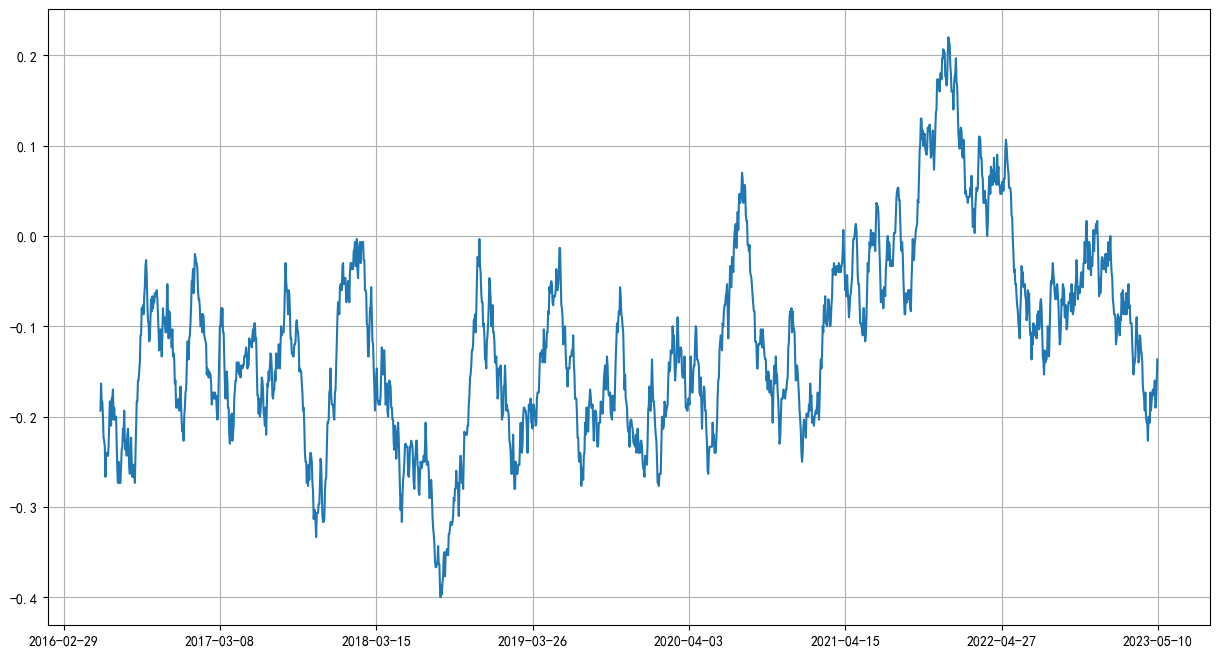

In [14]:
# 因子截面IC趋势
rankIC = xy.bonus_open_cl_rets.loc[['50', '300', '500', '1000'],'2016-02-28':].rank(ascending=False).corrwith(st_index_VROC_mean.loc[['50', '300', '500', '1000'],'2016-02-28':].rank(ascending=False))
rankIC.rolling(60).mean().plot(figsize=(15,8),grid=1)
rankIC.mean()

In [7]:
(-st_index_VROC_mean).to_csv(r'E:\PyProject\factors\NewFactor\st_index_VROC_mean.csv')